# Análisis de los datos obtenidos 

Uso de ipython para el análsis y muestra de los datos obtenidos durante la producción.Se implementa un regulador experto. Los datos analizados son del día 11 de Agosto del 2015

Los datos del experimento:
* Hora de inicio: 14:27
* Hora final : 15:08
* Centímetros de filamento extruido: 537
* Vmin tractora: 1.5 mm/s
* Vmax tractora: 3.4 mm/s
* Los incrementos de velocidades en las reglas del sistema experto son las mismas.

In [116]:
#Importamos las librerías utilizadas
import numpy as np
import pandas as pd
import seaborn as sns

In [117]:
#Mostramos las versiones usadas de cada librerías
print ("Numpy v{}".format(np.__version__))
print ("Pandas v{}".format(pd.__version__))
print ("Seaborn v{}".format(sns.__version__))

Numpy v1.9.2
Pandas v0.16.2
Seaborn v0.6.0


In [118]:
#Abrimos el fichero csv con los datos de la muestra
datos = pd.read_csv('1119703.CSV')

In [119]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [120]:
#Almacenamos en una lista las columnas del fichero con las que vamos a trabajar
columns = ['Diametro X', 'RPM TRAC']

In [121]:
#Mostramos un resumen de los datos obtenidoss
datos[columns].describe()
#datos.describe().loc['mean',['Diametro X [mm]', 'Diametro Y [mm]']]

,Diametro X,RPM TRAC
count,1526.000000,1526.000000
mean,1.721607,2.363879
std,0.299929,0.909141
min,1.206868,1.497500
25%,1.482145,1.497500
50%,1.631253,2.165000
75%,1.986820,3.500000
max,2.560314,3.500000


Representamos ambos diámetro y la velocidad de la tractora en la misma gráfica

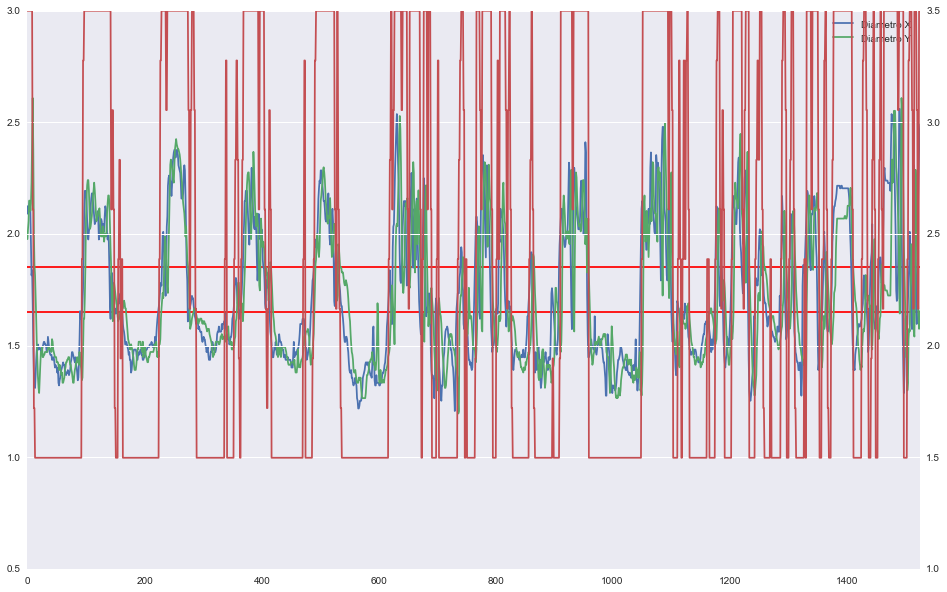

In [122]:
datos.ix[:, "Diametro X":"Diametro Y"].plot(figsize=(16,10),ylim=(0.5,3)).hlines([1.85,1.65],0,3500,colors='r')
datos['RPM TRAC'].plot(secondary_y='RPM TRAC')

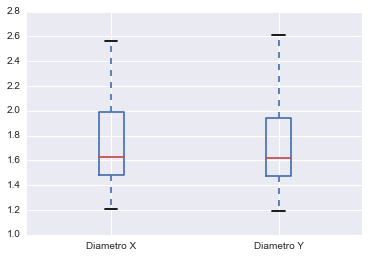

In [123]:
datos.ix[:, "Diametro X":"Diametro Y"].boxplot(return_type='axes')

En el boxplot, se ve como la mayoría de los datos están por encima de la media (primer cuartil). Se va a tratar de bajar ese porcentaje. La primera aproximación que vamos a realizar será la de hacer mayores incrementos al subir la velocidad en los tramos que el diámetro se encuentre entre $1.80mm$ y $1.75 mm$(caso 5) haremos incrementos de $d_v*2$ en lugar de $d_v*1$

Comparativa de Diametro X frente a Diametro Y para ver el ratio del filamento

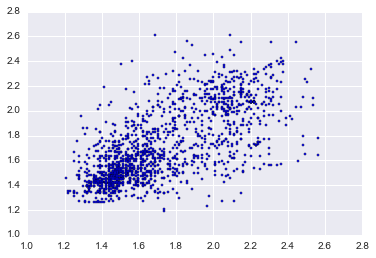

In [124]:
plt.scatter(x=datos['Diametro X'], y=datos['Diametro Y'], marker='.')

#Filtrado de datos
Las muestras tomadas $d_x >= 0.9$ or $d_y >= 0.9$ las asumimos como error del sensor, por ello las filtramos de las muestras tomadas.

In [125]:
datos_filtrados = datos[(datos['Diametro X'] >= 0.9) & (datos['Diametro Y'] >= 0.9)]

In [126]:
#datos_filtrados.ix[:, "Diametro X":"Diametro Y"].boxplot(return_type='axes')

##Representación de X/Y

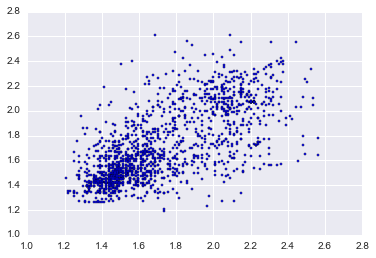

In [127]:
plt.scatter(x=datos_filtrados['Diametro X'], y=datos_filtrados['Diametro Y'], marker='.')

#Analizamos datos del ratio

In [128]:
ratio = datos_filtrados['Diametro X']/datos_filtrados['Diametro Y']
ratio.describe()

count    1526.000000
mean        1.016194
std         0.135635
min         0.632548
25%         0.940269
50%         0.999491
75%         1.077269
max         1.655858
dtype: float64

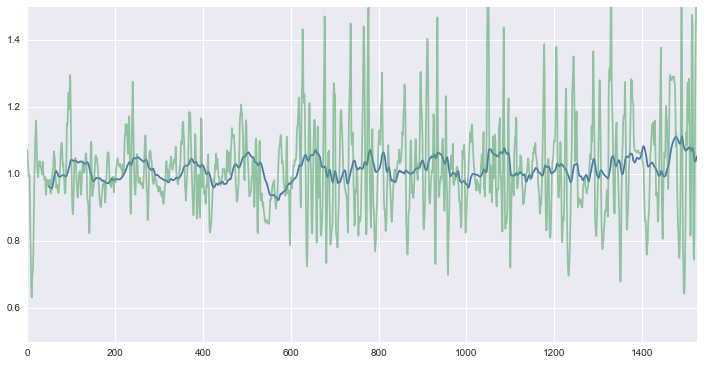

In [129]:
rolling_mean = pd.rolling_mean(ratio, 50)
rolling_std = pd.rolling_std(ratio, 50)
rolling_mean.plot(figsize=(12,6))
# plt.fill_between(ratio, y1=rolling_mean+rolling_std, y2=rolling_mean-rolling_std, alpha=0.5)
ratio.plot(figsize=(12,6), alpha=0.6, ylim=(0.5,1.5))

#Límites de calidad

Calculamos el número de veces que traspasamos unos límites de calidad. 
$Th^+ = 1.85$ and $Th^- = 1.65$ 

In [130]:
Th_u = 1.85
Th_d = 1.65

In [131]:
data_violations = datos[(datos['Diametro X'] > Th_u) | (datos['Diametro X'] < Th_d) |
                       (datos['Diametro Y'] > Th_u) | (datos['Diametro Y'] < Th_d)]

In [132]:
data_violations.describe()

,Tmp Husillo,Tmp Nozzle,Diametro X,Diametro Y,MARCHA,PARO,RPM EXTR,RPM TRAC
count,1469.000000,1469.000000,1469.000000,1469.000000,1469,1469,1469,1469.000000
mean,63.554323,151.313070,1.721209,1.706638,1,1,0,2.356450
std,0.279066,0.864951,0.305449,0.297587,0,0,0,0.913973
min,63.200000,149.500000,1.206868,1.195617,True,True,0,1.497500
25%,63.400000,150.600000,1.470675,1.471450,1,1,0,1.497500
50%,63.500000,151.300000,1.619783,1.609366,1,1,0,1.942500
75%,63.600000,151.900000,1.998289,1.954157,1,1,0,3.500000
max,64.400000,153.200000,2.560314,2.609260,True,True,0,3.500000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0D5F7B30>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x17532290>], dtype=object)

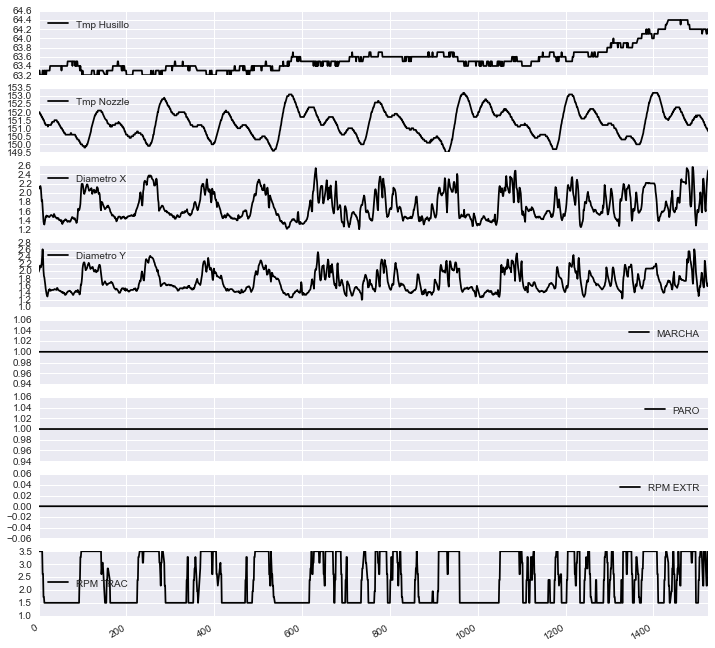

In [133]:
data_violations.plot(subplots=True, figsize=(12,12))